In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = X[:65000], X[65000:], y[:65000], y[65000:]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

knn_clf = KNeighborsClassifier()
y_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [9]:
y_pred.shape

(65000,)

In [14]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_pred)


In [15]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6383
           1       0.95      0.99      0.97      7313
           2       0.95      0.93      0.94      6488
           3       0.92      0.94      0.93      6631
           4       0.94      0.93      0.93      6342
           5       0.92      0.92      0.92      5877
           6       0.96      0.97      0.96      6380
           7       0.93      0.93      0.93      6777
           8       0.97      0.87      0.92      6340
           9       0.90      0.92      0.91      6469

    accuracy                           0.94     65000
   macro avg       0.94      0.94      0.94     65000
weighted avg       0.94      0.94      0.94     65000



In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.9394923076923077


In [17]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[6284,    5,   15,    7,    3,   19,   40,    4,    2,    4],
       [   2, 7231,   21,    7,   10,    4,   19,   11,    5,    3],
       [  76,   69, 6012,  104,   38,    7,   53,   67,   42,   20],
       [  16,   26,   56, 6257,    9,   96,    7,   73,   55,   36],
       [   8,   72,   60,    7, 5890,   16,   29,   32,   11,  217],
       [  33,   16,   15,  176,   23, 5406,   94,   18,   45,   51],
       [  68,   17,   24,    3,   14,   55, 6190,    1,    7,    1],
       [  12,   83,   32,   19,   84,    3,    0, 6312,    3,  229],
       [  70,   93,   61,  136,   53,  248,   42,   25, 5538,   74],
       [  23,   20,   26,   61,  134,   20,    0,  214,   24, 5947]],
      dtype=int64)

<Axes: >

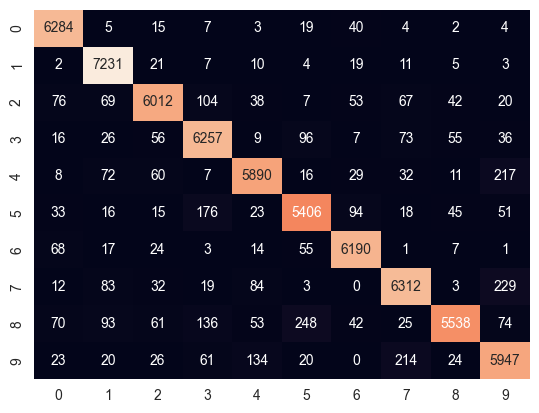

In [34]:
import seaborn as sns
sns.heatmap(conf_mx, annot=True, fmt='d', cbar=False)

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred=y_pred, average="macro")

0.9388020172061555

In [31]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_pred, average="macro")
recall = recall_score(y_train, y_pred, average="macro")
f1 = f1_score(y_train, y_pred, average="macro")
print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Precision: 0.9396445948793986, Recall: 0.938650940498006, F1 Score: 0.9388020172061555


In [24]:
sample=X_test[0]

In [25]:
sample=sample.reshape(28,28)

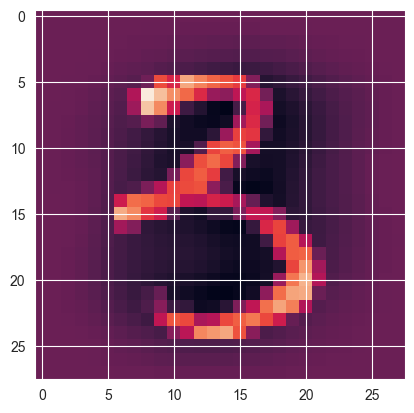

In [26]:
from matplotlib import pyplot as plt
plt.imshow(sample)

In [29]:
knn_clf.fit(X_train,y_train)
result=knn_clf.predict(sample.reshape(1,-1))


In [30]:
print(result)

['3']


In [32]:
y_test_pred = knn_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9618


In [68]:
import joblib
joblib.dump(knn_clf, 'model.pkl')

['model.pkl']